<a href="https://colab.research.google.com/github/VigneshwaraChinnadurai/ML-Learning/blob/master/Session_7_Support_Vector_Regression/SVR_ml_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#STEP-1: Install Import Libraries
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

#STEP-2: Autheticate E-Mail ID

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#STEP-3: Get File from Drive using file-ID

#2.1 Get the file
downloaded = drive.CreateFile({'id':'1T6JMGO3UmASqA_V17GAX1406ycM6oI_B'})
# replace the id with id of file you want to access
downloaded.GetContentFile('Position_Salaries_SVR.csv') 

#STEP-4: Read File

#3.1 Read file as panda dataframe
import pandas as pd
data = pd.read_csv('Position_Salaries_SVR.csv') 
print(data.head())

            Position  Level  Salary
0   Business Analyst      1   45000
1  Junior Consultant      2   50000
2  Senior Consultant      3   60000
3            Manager      4   80000
4    Country Manager      5  110000


In [0]:
x=data.iloc[:,1:2].values
y=data.iloc[:,2:3].values

In [0]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
sc_y=StandardScaler()
x=sc_x.fit_transform(x)
y=sc_y.fit_transform(y)

In [0]:
# Feature regression excludes first and last values inorder to set its limit.

In [5]:
from sklearn.svm import SVR
regressor=SVR(kernel='rbf',degree=3)
regressor.fit(x,y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
import numpy as np
y_pred=sc_y.inverse_transform(regressor.predict(sc_x.transform(np.array([[6.5]]))))
# This represents k^-1 in formulae

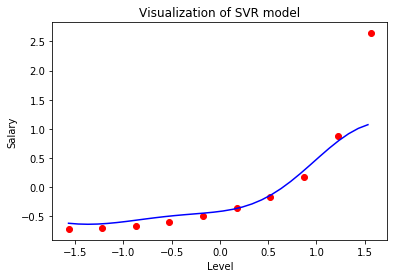

In [9]:
import matplotlib.pyplot as plt
x_grid=np.arange(min(x),max(x),0.1)
x_grid=x_grid.reshape((len(x_grid),1))
plt.scatter(x,y,color='red')
plt.plot(x_grid,regressor.predict(x_grid),color='blue')
plt.title('Visualization of SVR model')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

In [0]:
# Copy of this is saved in your SPYDER notebook.